In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [2]:
df_test = pd.read_csv('./test.csv')

In [3]:
df = pd.read_csv('./train.csv')

In [424]:
df_test

,ID,성별,차량 소유 여부,부동산 소유 여부,자녀 수,연간 수입,수입 유형,최종 학력,결혼 여부,주거 형태,거주지 인구 비율,휴대전화 소유 여부,업무용 휴대전화 소유 여부,이메일 소유 여부,직업,가족 구성원 수,산업군,나이,근속연수,가입연수
0,TEST_00000,남성,0,0,2,37170000.0,근로자,대학교 중퇴,기혼,주택 / 아파트,0.006296,1,1,0,핵심 노동자,4.0,기타 0,27,2,8.0
1,TEST_00001,남성,0,0,0,47790000.0,근로자,대학교 졸업 이상,기혼,주택 / 아파트,0.004960,1,1,0,관리직,2.0,정부,40,8,11.0
2,TEST_00002,남성,1,1,1,37170000.0,공무원,고등학교 졸업,기혼,주택 / 아파트,0.026392,1,1,0,관리직,3.0,국가 안보,43,15,14.0
3,TEST_00003,여성,0,1,0,31860000.0,연금수령자,고등학교 졸업,기혼,주택 / 아파트,0.014464,1,0,0,Unknown,2.0,기타 1,51,1000,7.0
4,TEST_00004,여성,0,1,2,19116000.0,근로자,고등학교 졸업,기혼,공공분양,0.031329,1,1,0,의료 업계 종사자,4.0,의학,31,10,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,TEST_39995,여성,1,1,0,84960000.0,기타,대학교 졸업 이상,기혼,주택 / 아파트,0.072508,1,1,1,Unknown,2.0,사업 2,27,2,12.0
39996,TEST_39996,여성,0,1,0,21240000.0,근로자,고등학교 졸업,별거,주택 / 아파트,0.009175,1,1,0,영업직,1.0,자영업,54,4,29.0
39997,TEST_39997,여성,0,0,1,21240000.0,공무원,고등학교 졸업,기혼,공공분양,0.072508,1,1,0,단순 노동자,3.0,국가 안보,48,14,22.0
39998,TEST_39998,여성,1,0,0,18054000.0,연금수령자,고등학교 졸업,기혼,주택 / 아파트,0.011703,1,0,0,Unknown,2.0,기타 1,61,1000,31.0


# 목차

## 데이터 전처리

1. 컬럼값 분석

2. 결측값 확인

3. 연관성 확인

## 모델링

1. RandomForestClassifier

2. DecisionTreeClassfier

2. Catboost

3. LogisticRegressor

## 최종 결론

1. 결과

2. 보완점

# 데이터 정보 확인

## 1. 컬럼값 분석

* 각 컬럼은 다음과 같다.
    * ID : 신용카드를 보유한 고객의 고유 ID
    * TARGET : 고객의 신용카드 연체 여부
    * 성별
    * 차량 소유 여부
    * 부동산 소유 여부
    * 자녀 수
    * 연간 수입 : 단위 원
    * 수입 유형
    * 최종 학력
    * 결혼 여부
    * 주거 형태
    * 거주지 인구 비율: 고객이 거주하는 지역 인근의 인구 비율 (범위 0~1)
    * 휴대전화 소유 여부
    * 업무용 휴대폰 소유 여부
    * 이메일 소유 여부
    * 직업
    * 가족 구성원 수
    * 산업군 : 고객이 종사하는 직종의 산업군
    * 나이
    * 근속연수
    * 가입연수


In [425]:
df

,ID,TARGET,성별,차량 소유 여부,부동산 소유 여부,자녀 수,연간 수입,수입 유형,최종 학력,결혼 여부,...,거주지 인구 비율,휴대전화 소유 여부,업무용 휴대전화 소유 여부,이메일 소유 여부,직업,가족 구성원 수,산업군,나이,근속연수,가입연수
0,TRAIN_00000,0,여성,1,1,2,18054000.0,연금수령자,고등학교 졸업,기혼,...,0.004960,1,0,0,Unknown,4.0,기타 1,39,1000,23.0
1,TRAIN_00001,0,남성,1,0,0,59472000.0,근로자,대학교 졸업 이상,기혼,...,0.018029,1,1,0,기술직,2.0,사업 1,45,4,16.0
2,TRAIN_00002,0,여성,0,1,0,29736000.0,근로자,고등학교 졸업,기혼,...,0.010500,1,1,0,단순 노동자,2.0,사업 0,32,3,9.0
3,TRAIN_00003,0,여성,1,0,1,38232000.0,기타,고등학교 졸업,기혼,...,0.004849,1,1,0,Unknown,3.0,산업 4,34,6,12.0
4,TRAIN_00004,0,여성,0,1,0,26550000.0,근로자,고등학교 졸업,기혼,...,0.025164,1,1,0,Unknown,2.0,사업 2,38,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,TRAIN_59995,0,여성,0,1,0,15930000.0,연금수령자,고등학교 졸업,미혼,...,0.014520,1,0,0,Unknown,1.0,기타 1,60,1000,29.0
59996,TRAIN_59996,1,남성,1,1,0,53100000.0,근로자,고등학교 졸업,기혼,...,0.010032,1,1,0,운전자,2.0,자영업,42,1,1.0
59997,TRAIN_59997,1,여성,0,0,0,47790000.0,근로자,대학교 졸업 이상,미혼,...,0.019101,1,1,0,Unknown,1.0,은행,26,1,7.0
59998,TRAIN_59998,0,여성,1,1,0,29736000.0,근로자,고등학교 졸업,사별,...,0.015221,1,1,0,핵심 노동자,1.0,우체부,50,21,16.0


## 기초 접근 방식

### Boolean 값으로 변환할 것을 정하고, 나이와 자녀 수 등의 숫자 항목은 범주화를 고려해보자.

### 직업의 가짓수와, 주거 형태 등의 가짓수를 체크하자

### 표면적인 결측값은 없지만, 근속연수에 1000, 0 등의 값이 있다

In [426]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              60000 non-null  object 
 1   TARGET          60000 non-null  int64  
 2   성별              60000 non-null  object 
 3   차량 소유 여부        60000 non-null  int64  
 4   부동산 소유 여부       60000 non-null  int64  
 5   자녀 수            60000 non-null  int64  
 6   연간 수입           60000 non-null  float64
 7   수입 유형           60000 non-null  object 
 8   최종 학력           60000 non-null  object 
 9   결혼 여부           60000 non-null  object 
 10  주거 형태           60000 non-null  object 
 11  거주지 인구 비율       60000 non-null  float64
 12  휴대전화 소유 여부      60000 non-null  int64  
 13  업무용 휴대전화 소유 여부  60000 non-null  int64  
 14  이메일 소유 여부       60000 non-null  int64  
 15  직업              60000 non-null  object 
 16  가족 구성원 수        60000 non-null  float64
 17  산업군             60000 non-null 

In [427]:
df['TARGET'].value_counts()

TARGET
0    53572
1     6428
Name: count, dtype: int64

In [428]:
df['차량 소유 여부'].nunique()

2

In [429]:
df['부동산 소유 여부'].nunique()

2

In [430]:
df['산업군'].nunique()

56

In [431]:
df['근속연수'].value_counts()

근속연수
1000    11275
1        6000
2        5714
0        5309
3        4825
4        4225
5        3123
6        2840
7        2559
8        2215
9        1792
10       1466
11       1161
12       1063
14        926
13        814
15        557
16        490
18        379
19        375
17        349
20        313
21        285
22        269
23        191
24        185
25        173
26        147
28        142
27        117
29         96
34         85
30         85
31         81
32         71
33         70
35         55
36         47
38         29
37         28
39         27
40         12
41         10
42          9
44          6
45          5
43          3
48          1
46          1
Name: count, dtype: int64

In [432]:
df['직업'].value_counts()

직업
Unknown      19035
단순 노동자       10780
영업직           6178
핵심 노동자        5194
관리직           4264
운전자           3572
기술직           2240
회계사           1908
의료 업계 종사자     1671
보안 업계 종사자     1384
조리사           1187
미화원            889
가정부            458
저임금 노동자        379
비서             252
요식업 종사자        248
부동산중개업자        154
인사 담당자         120
IT 업계 종사자       87
Name: count, dtype: int64

In [433]:
df['차량 소유 여부'] = df['차량 소유 여부'].apply(lambda x: True if x == 1 else False)
df['휴대전화 소유 여부'] = df['휴대전화 소유 여부'].apply(lambda x: True if x == 1 else False)
df['부동산 소유 여부'] = df['부동산 소유 여부'].apply(lambda x: True if x == 1 else False)
df['이메일 소유 여부'] = df['이메일 소유 여부'].apply(lambda x: True if x == 1 else False)
df_test['차량 소유 여부'] = df_test['차량 소유 여부'].apply(lambda x: True if x == 1 else False)
df_test['휴대전화 소유 여부'] = df_test['휴대전화 소유 여부'].apply(lambda x: True if x == 1 else False)
df_test['부동산 소유 여부'] = df_test['부동산 소유 여부'].apply(lambda x: True if x == 1 else False)
df_test['이메일 소유 여부'] = df_test['이메일 소유 여부'].apply(lambda x: True if x == 1 else False)

In [434]:
df['나이'].describe()

count    60000.000000
mean        44.021183
std         11.852450
min         21.000000
25%         34.000000
50%         43.000000
75%         54.000000
max         69.000000
Name: 나이, dtype: float64

In [435]:
df['최종 학력'].value_counts()

최종 학력
고등학교 졸업      42910
대학교 졸업 이상    14459
대학교 중퇴        1883
저학력자           748
Name: count, dtype: int64

In [436]:
df['최종 학력'].nunique()

4

# 2. 결측값 처리
* 결측값의 유력한 후보는 근속연수와 직업이다
* 이에 따라 여러 가정을 거쳐 처리할 방안을 고민한다

#### 가정: 근속연수 0 은 무직을, 1000은 결측값을 뜻하는 것일 수도 있다.
* 그럴 시, Unknown은 마찬가지로 직업 중 무직을 뜻하는 요소일 수 있다.
* 그러므로 df에서 근속연수 0과 1000을 잘라 확인해보자

In [437]:
df[df['근속연수'] == 0]['직업'].value_counts()

직업
단순 노동자       1180
영업직           844
Unknown       812
핵심 노동자        503
운전자           471
관리직           335
기술직           236
보안 업계 종사자     196
회계사           182
조리사           131
의료 업계 종사자     109
미화원           108
저임금 노동자        56
가정부            47
비서             37
요식업 종사자        22
부동산중개업자        17
IT 업계 종사자      12
인사 담당자         11
Name: count, dtype: int64

In [438]:
df[df['근속연수'] == 1000]['직업'].value_counts()

직업
Unknown    11274
미화원            1
Name: count, dtype: int64

#### 결론: 근속연수 1000은 결측값을 의미할 확률이 높다
* 0은 그 해에 취직한 인원을 말하는 것으로 짐작해볼 수 있다
* 실제로 근속연수 1000과 직업 Unknown은 대부분 일치한다

In [439]:
result = df[df['근속연수'].isin([1000, 0])]

In [440]:
df.describe()

,TARGET,자녀 수,연간 수입,거주지 인구 비율,업무용 휴대전화 소유 여부,가족 구성원 수,나이,근속연수,가입연수
count,60000.000000,60000.000000,6.000000e+04,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,0.107133,0.412050,3.983699e+07,0.020880,0.812033,2.155767,44.021183,192.906833,13.271833
std,0.309285,0.723998,2.472331e+07,0.013850,0.390689,0.908213,11.852450,388.292796,9.727011
min,0.000000,0.000000,6.265800e+06,0.000533,0.000000,1.000000,21.000000,0.000000,0.000000
25%,0.000000,0.000000,2.655000e+07,0.010006,1.000000,2.000000,34.000000,2.000000,5.000000
50%,0.000000,0.000000,3.504600e+07,0.018850,1.000000,2.000000,43.000000,6.000000,12.000000
75%,0.000000,1.000000,4.779000e+07,0.028663,1.000000,3.000000,54.000000,16.000000,20.000000
max,1.000000,19.000000,2.124000e+09,0.072508,1.000000,20.000000,69.000000,1000.000000,58.000000


In [441]:
result.describe()

,TARGET,자녀 수,연간 수입,거주지 인구 비율,업무용 휴대전화 소유 여부,가족 구성원 수,나이,근속연수,가입연수
count,16584.00000,16584.000000,1.658400e+04,16584.000000,16584.000000,16584.000000,16584.000000,16584.000000,16584.000000
mean,0.09473,0.201158,3.445666e+07,0.021002,0.320128,1.876930,52.388447,679.872166,15.611011
std,0.29285,0.544744,1.916580e+07,0.013775,0.466540,0.760693,12.429551,466.539525,11.050524
min,0.00000,0.000000,6.265800e+06,0.000533,0.000000,1.000000,21.000000,0.000000,0.000000
25%,0.00000,0.000000,2.124000e+07,0.010032,0.000000,1.000000,45.000000,0.000000,6.000000
50%,0.00000,0.000000,3.186000e+07,0.018850,0.000000,2.000000,57.000000,1000.000000,14.000000
75%,0.00000,0.000000,4.248000e+07,0.028663,1.000000,2.000000,62.000000,1000.000000,24.000000
max,1.00000,11.000000,3.186000e+08,0.072508,1.000000,13.000000,69.000000,1000.000000,58.000000


In [442]:
result['직업'].value_counts()

직업
Unknown      12086
단순 노동자        1180
영업직            844
핵심 노동자         503
운전자            471
관리직            335
기술직            236
보안 업계 종사자      196
회계사            182
조리사            131
미화원            109
의료 업계 종사자      109
저임금 노동자         56
가정부             47
비서              37
요식업 종사자         22
부동산중개업자         17
IT 업계 종사자       12
인사 담당자          11
Name: count, dtype: int64

In [443]:
df[df['가입연수'] == 0].count()

ID                3223
TARGET            3223
성별                3223
차량 소유 여부          3223
부동산 소유 여부         3223
자녀 수              3223
연간 수입             3223
수입 유형             3223
최종 학력             3223
결혼 여부             3223
주거 형태             3223
거주지 인구 비율         3223
휴대전화 소유 여부        3223
업무용 휴대전화 소유 여부    3223
이메일 소유 여부         3223
직업                3223
가족 구성원 수          3223
산업군               3223
나이                3223
근속연수              3223
가입연수              3223
dtype: int64

In [444]:
df.groupby('근속연수')['TARGET'].value_counts()

근속연수  TARGET
0     0          4542
      1           767
1     0          5067
      1           933
2     0          4914
                ...  
45    0             5
46    0             1
48    0             1
1000  0         10471
      1           804
Name: count, Length: 88, dtype: int64

In [445]:
df['결혼 여부'].value_counts()

결혼 여부
기혼     38795
미혼      8300
사실혼     5828
별거      3770
사별      3307
Name: count, dtype: int64

In [446]:
df['성별'] = df['성별'].apply(lambda x: True if x == '여성' else False)
df['결혼 여부'] = df['결혼 여부'].apply(lambda x: True if x == '기혼' or x == '사실혼' else False)
df_test['성별'] = df_test['성별'].apply(lambda x: True if x == '여성' else False)
df_test['결혼 여부'] = df_test['결혼 여부'].apply(lambda x: True if x == '기혼' or x == '사실혼' else False)

In [447]:
df

,ID,TARGET,성별,차량 소유 여부,부동산 소유 여부,자녀 수,연간 수입,수입 유형,최종 학력,결혼 여부,...,거주지 인구 비율,휴대전화 소유 여부,업무용 휴대전화 소유 여부,이메일 소유 여부,직업,가족 구성원 수,산업군,나이,근속연수,가입연수
0,TRAIN_00000,0,True,True,True,2,18054000.0,연금수령자,고등학교 졸업,True,...,0.004960,True,0,False,Unknown,4.0,기타 1,39,1000,23.0
1,TRAIN_00001,0,False,True,False,0,59472000.0,근로자,대학교 졸업 이상,True,...,0.018029,True,1,False,기술직,2.0,사업 1,45,4,16.0
2,TRAIN_00002,0,True,False,True,0,29736000.0,근로자,고등학교 졸업,True,...,0.010500,True,1,False,단순 노동자,2.0,사업 0,32,3,9.0
3,TRAIN_00003,0,True,True,False,1,38232000.0,기타,고등학교 졸업,True,...,0.004849,True,1,False,Unknown,3.0,산업 4,34,6,12.0
4,TRAIN_00004,0,True,False,True,0,26550000.0,근로자,고등학교 졸업,True,...,0.025164,True,1,False,Unknown,2.0,사업 2,38,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,TRAIN_59995,0,True,False,True,0,15930000.0,연금수령자,고등학교 졸업,False,...,0.014520,True,0,False,Unknown,1.0,기타 1,60,1000,29.0
59996,TRAIN_59996,1,False,True,True,0,53100000.0,근로자,고등학교 졸업,True,...,0.010032,True,1,False,운전자,2.0,자영업,42,1,1.0
59997,TRAIN_59997,1,True,False,False,0,47790000.0,근로자,대학교 졸업 이상,False,...,0.019101,True,1,False,Unknown,1.0,은행,26,1,7.0
59998,TRAIN_59998,0,True,True,True,0,29736000.0,근로자,고등학교 졸업,False,...,0.015221,True,1,False,핵심 노동자,1.0,우체부,50,21,16.0


In [448]:
df2 = df.drop('ID', axis=1)

In [449]:
print(df2.columns)

Index(['TARGET', '성별', '차량 소유 여부', '부동산 소유 여부', '자녀 수', '연간 수입', '수입 유형',
       '최종 학력', '결혼 여부', '주거 형태', '거주지 인구 비율', '휴대전화 소유 여부', '업무용 휴대전화 소유 여부',
       '이메일 소유 여부', '직업', '가족 구성원 수', '산업군', '나이', '근속연수', '가입연수'],
      dtype='object')


In [450]:
df['나이'].value_counts()

나이
38    1747
39    1744
36    1685
41    1674
40    1663
37    1662
43    1606
42    1580
44    1565
53    1562
31    1533
27    1531
35    1529
54    1515
45    1481
34    1476
30    1472
46    1457
28    1456
32    1450
33    1450
56    1408
29    1408
48    1392
47    1385
57    1382
52    1371
55    1348
50    1347
49    1347
51    1327
60    1324
58    1311
59    1309
62    1147
61    1095
64    1048
63    1035
26     789
25     740
24     694
23     663
65     605
67     463
66     437
22     416
21     190
68     177
69       4
Name: count, dtype: int64

In [7]:
def age_cat(x):
    if x == 1000:
        return 0
    if x <= 5:
        return 5
    if x <= 10:
        return 10
    if x <= 20:
        return 15
    else:
        return 20

def age_cat2(x):
    if x < 30:
        return '20s'
    if x < 40:
        return '30s'
    if x < 50:
        return '40s'
    else:
        return '50+'

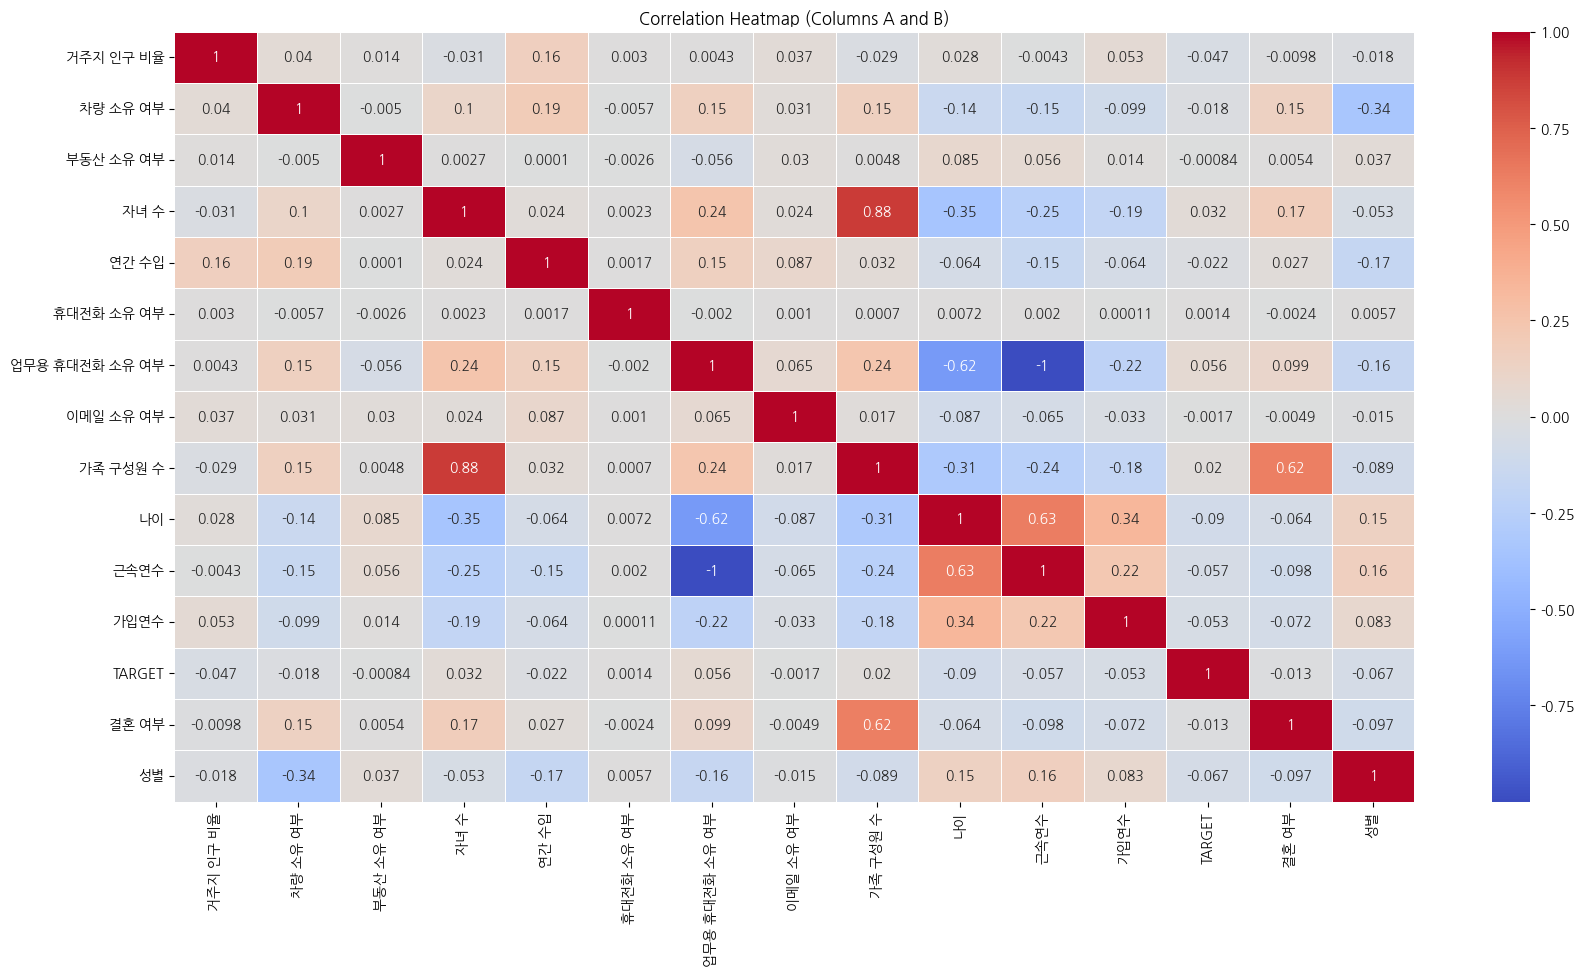

In [452]:
corr_matrix_two_cols = df2[['거주지 인구 비율', '차량 소유 여부','부동산 소유 여부', '자녀 수', '연간 수입',  '휴대전화 소유 여부', '업무용 휴대전화 소유 여부',
       '이메일 소유 여부', '가족 구성원 수','나이', '근속연수', '가입연수', 'TARGET', '결혼 여부', '성별']].corr()

# 히트맵 시각화
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix_two_cols, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap (Columns A and B)')
plt.show()

In [453]:
df['근속연수'] = df['근속연수'].apply(lambda x: age_cat(x))

In [454]:
df['나이'] = df['나이'].apply(lambda x: age_cat2(x))

## corr 에 대한 특이 사항

* 결혼 여부와, 자녀 수는 가족 구성원 수와 큰 관계가 있다. 가족 구성원 수라는 단일 컬럼만 사용하기로 한다.

* 근속 연수와 나이도 큰 관계가 있지만, 우선 나이와 근속 연수 모두를 범주화 해서 사용해보자

* 연간 수입은 높은것과 비례할 수 있으므로, 범주화를 하지 않고 실행해보도록 한다.

* 지나치게 연관성이 낮다고 고려되는 컬럼들을 우선 제거하고 실행해보도록 한다.

### 이후 고려 대상

* TARGET의 1 비중이 너무 적다. SMOTE를 이용한 증폭 고려하기

* 단순한 Dummy화 말고 LabelEncoding을 몇 가지에 적용해보기

* 삭제한 컬럼들에 대해 더 생각해보고 추가 실행하기

In [4]:
df_train = df.drop(['ID', '자녀 수', '수입 유형', '결혼 여부', '휴대전화 소유 여부', '거주지 인구 비율', '산업군', '직업'], axis=1)

In [5]:
df_test = df_test.drop(['ID', '자녀 수', '수입 유형', '결혼 여부', '휴대전화 소유 여부', '거주지 인구 비율', '산업군', '직업'], axis=1)

In [8]:
df_test['근속연수'] = df_test['근속연수'].apply(lambda x: age_cat(x))

In [9]:
df['나이'] = df['나이'].apply(lambda x: age_cat2(x))
df_test['나이'] = df_test['나이'].apply(lambda x: age_cat2(x))

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import accuracy_score, f1_score

In [11]:
y_train = df_train['TARGET']
X_train = df_train.drop(['TARGET'], axis = 1)
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(df_test, drop_first=True)

## 1. RandomForestClassifier

In [12]:
rf_model = RandomForestClassifier(random_state=42)

# 탐색할 하이퍼파라미터 그리드
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 하이퍼파라미터 출력
print("최적 파라미터:", grid_search.best_params_)

# 최적 모델
best_rf_model = grid_search.best_estimator_

# 최적 모델 예측
y_pred = best_rf_model.predict(X_test)

KeyboardInterrupt: 

In [ ]:
rf_model = RandomForestClassifier(max_depth= None, min_samples_leaf= 4, min_samples_split= 2, n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [ ]:
dtc_model = DecisionTreeClassifier(random_state=42)
dtc_model.fit(X_train, y_train)
y_pred_dtc = dtc_model.predict(X_test)


In [ ]:
submission = pd.read_csv('./sample_submission.csv')

In [ ]:
submission['TARGET'] = y_pred

In [ ]:
submission.to_csv('./submission3.csv', index=False)

Decision Tree Model(data ver1)
점수: 0.512
* 결과의 내용 분석
    * 지나치게 많은 컬럼 드랍
    * 결측값을 제대로 메꾸지 않음
 
RFC Model(data ver1)
점수: 0.5??
* 결과의 내용 분석
    * GridSearch에 대한 이해부족
    * 마찬가지로 지나친 컬럼 드랍
 
--> proba로 내야했는데 잘못 제출한거였다...

### 개선 방안

* 컬럼을 최대한 살려보자

* SMOTE로 1을 증폭시켜, 예측을 좀더 잘하게 유도하자

* 학력을 LabelEncoding 해보자

#### 확인할 점

* 학력은 실제로 연관성이 있을까?

In [13]:
df = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

In [14]:
df['최종 학력'].value_counts()

최종 학력
고등학교 졸업      42910
대학교 졸업 이상    14459
대학교 중퇴        1883
저학력자           748
Name: count, dtype: int64

In [15]:
df_high = df[df['최종 학력'] == '고등학교 졸업']

In [16]:
df_univ_mid = df[df['최종 학력'] == '대학교 중퇴']

In [17]:
df_univ = df[df['최종 학력'] == '대학교 졸업 이상']

In [18]:
df_low = df[df['최종 학력'] == '저학력자']

In [19]:
df['TARGET'].value_counts()

TARGET
0    53572
1     6428
Name: count, dtype: int64

In [20]:
df_high['TARGET'].value_counts()

TARGET
0    37833
1     5077
Name: count, dtype: int64

In [21]:
df_univ_mid['TARGET'].value_counts()

TARGET
0    1676
1     207
Name: count, dtype: int64

In [22]:
df_univ['TARGET'].value_counts()

TARGET
0    13423
1     1036
Name: count, dtype: int64

In [23]:
df_low['TARGET'].value_counts()

TARGET
0    640
1    108
Name: count, dtype: int64

In [24]:
print('전체 평균',  6428/60000)
print('고등학교 졸업', 5077/42910)
print('대학교 중퇴', 207/1883)
print('대학교 졸업 이상', 1036/14459)
print('저학력자', 108/748)

전체 평균 0.10713333333333333
고등학교 졸업 0.1183174085294803
대학교 중퇴 0.10993096123207648
대학교 졸업 이상 0.07165087488761325
저학력자 0.1443850267379679


#### 결론적으로, 학력은 고학력일 수록 평균적으로 연체자가 적다, 라벨 인코딩을 적용하자

In [56]:
def labeling(x):
    if x == '저학력자':
        return 1
    if x == '고등학교 졸업':
        return 2
    if x == '대학교 중퇴':
        return 3
    if x == '대학교 졸업 이상':
        return 4

In [26]:
df['최종 학력'] = df['최종 학력'].apply(lambda x: labeling(x))
df_test['최종 학력'] = df_test['최종 학력'].apply(lambda x: labeling(x))

In [27]:
df['최종 학력']

0        2
1        4
2        2
3        2
4        2
        ..
59995    2
59996    2
59997    4
59998    2
59999    2
Name: 최종 학력, Length: 60000, dtype: int64

#### 직업도 마찬가지로 연관성이 있을 것으로 짐작 가능

* 하지만 라벨 인코딩으로 하기엔 부적합하다고 생각해, 더미화 시키기로 한다.

In [28]:
df.groupby('직업')['TARGET'].value_counts()

직업         TARGET
IT 업계 종사자  0            81
           1             6
Unknown    0         17414
           1          1621
가정부        0           417
           1            41
관리직        0          3887
           1           377
기술직        0          2063
           1           177
단순 노동자     0          9276
           1          1504
미화원        0           771
           1           118
보안 업계 종사자  0          1178
           1           206
부동산중개업자    0           138
           1            16
비서         0           227
           1            25
영업직        0          5401
           1           777
요식업 종사자    0           214
           1            34
운전자        0          3035
           1           537
의료 업계 종사자  0          1519
           1           152
인사 담당자     0           110
           1            10
저임금 노동자    0           289
           1            90
조리사        0          1024
           1           163
핵심 노동자     0          4736
           1           458
회계사       

In [29]:
df.groupby('수입 유형')['TARGET'].value_counts()

수입 유형  TARGET
공무원    0          3831
       1           315
근로자    0         26787
       1          3906
기타     0         12476
       1          1403
사업가    0             2
실직자    0             4
연금수령자  0         10470
       1           804
학생     0             2
Name: count, dtype: int64

In [30]:
print('전체 평균',  6428/60000)
print('공무원', 315/4146)
print('근로자', 3906/30693)
print('기타', 1403/13879)
print('연금수령자', 804/10274)

전체 평균 0.10713333333333333
공무원 0.07597684515195369
근로자 0.1272602873619392
기타 0.10108797463794221
연금수령자 0.07825579131788982


### 근속연수 1000과 관련이 깊은 unknown 직업들을 

* 근속연수 1000은 대부분이 연금 수령자이며, 직업이 Unknown으로 분류됨

* 현재 근무중이라 보기는 힘들다

* 그렇다면 근속연수를 0으로 바꿀 것인가? 아니면 정년 퇴직 년도만큼으로 치환할 것인가(후자로 시도)

In [31]:
unknowns = df[df['직업'] == 'Unknown']

In [32]:
unknowns['수입 유형'].value_counts()

수입 유형
연금수령자    11272
근로자       4765
기타        2282
공무원        712
실직자          4
Name: count, dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              60000 non-null  object 
 1   TARGET          60000 non-null  int64  
 2   성별              60000 non-null  object 
 3   차량 소유 여부        60000 non-null  int64  
 4   부동산 소유 여부       60000 non-null  int64  
 5   자녀 수            60000 non-null  int64  
 6   연간 수입           60000 non-null  float64
 7   수입 유형           60000 non-null  object 
 8   최종 학력           60000 non-null  int64  
 9   결혼 여부           60000 non-null  object 
 10  주거 형태           60000 non-null  object 
 11  거주지 인구 비율       60000 non-null  float64
 12  휴대전화 소유 여부      60000 non-null  int64  
 13  업무용 휴대전화 소유 여부  60000 non-null  int64  
 14  이메일 소유 여부       60000 non-null  int64  
 15  직업              60000 non-null  object 
 16  가족 구성원 수        60000 non-null  float64
 17  산업군             60000 non-null 

In [35]:
df['근속연수'] = df['근속연수'].apply(lambda x: 30 if x == 1000 else x)
df_test['근속연수'] = df_test['근속연수'].apply(lambda x: 30 if x == 1000 else x)

### 결혼 여부는 얼마나 관계가 있을까?

* 기존에는 상대적으로 단순하게 boolean값으로 변환했던 결혼 여부가 TARGET과 연관이 있는 지 체크

* 기혼과 사별은 평균보다 낮으며, 이외의 미혼, 별거, 사실혼은 평균보다 소폭 높으니, 두 그룹으로 묶거나 그대로 사용하자

In [36]:
df.groupby('결혼 여부')['TARGET'].value_counts()

결혼 여부  TARGET
기혼     0         34868
       1          3927
미혼     0          7237
       1          1063
별거     0          3320
       1           450
사별     0          3070
       1           237
사실혼    0          5077
       1           751
Name: count, dtype: int64

In [37]:
print('전체 평균',  6428/60000)
print('기혼', 3927/38795)
print('미혼', 1063/8300)
print('별거', 450/3770)
print('사별', 237/3307)
print('사실혼', 751/5828)

전체 평균 0.10713333333333333
기혼 0.10122438458564248
미혼 0.1280722891566265
별거 0.11936339522546419
사별 0.07166616268521318
사실혼 0.12886067261496226


In [38]:
df['주거 형태'].value_counts()

주거 형태
주택 / 아파트    56042
공공분양         2352
아파트 임대       1080
오피스텔          526
Name: count, dtype: int64

### 주거 형태는 현재까지 상태로는, 큰 연관성을 찾기 힘들어 보인다

In [39]:
df.groupby('주거 형태')['TARGET'].value_counts()

주거 형태     TARGET
공공분양      0          2089
          1           263
아파트 임대    0           898
          1           182
오피스텔      0           465
          1            61
주택 / 아파트  0         50120
          1          5922
Name: count, dtype: int64

In [40]:
df['나이'] = df['나이'].apply(lambda x: age_cat2(x))
df_test['나이'] = df_test['나이'].apply(lambda x: age_cat2(x))

In [41]:
df['성별'] = df['성별'].apply(lambda x: 1 if x == '남성' else 0)
df_test['성별'] = df_test['성별'].apply(lambda x: 1 if x == '남성' else 0)

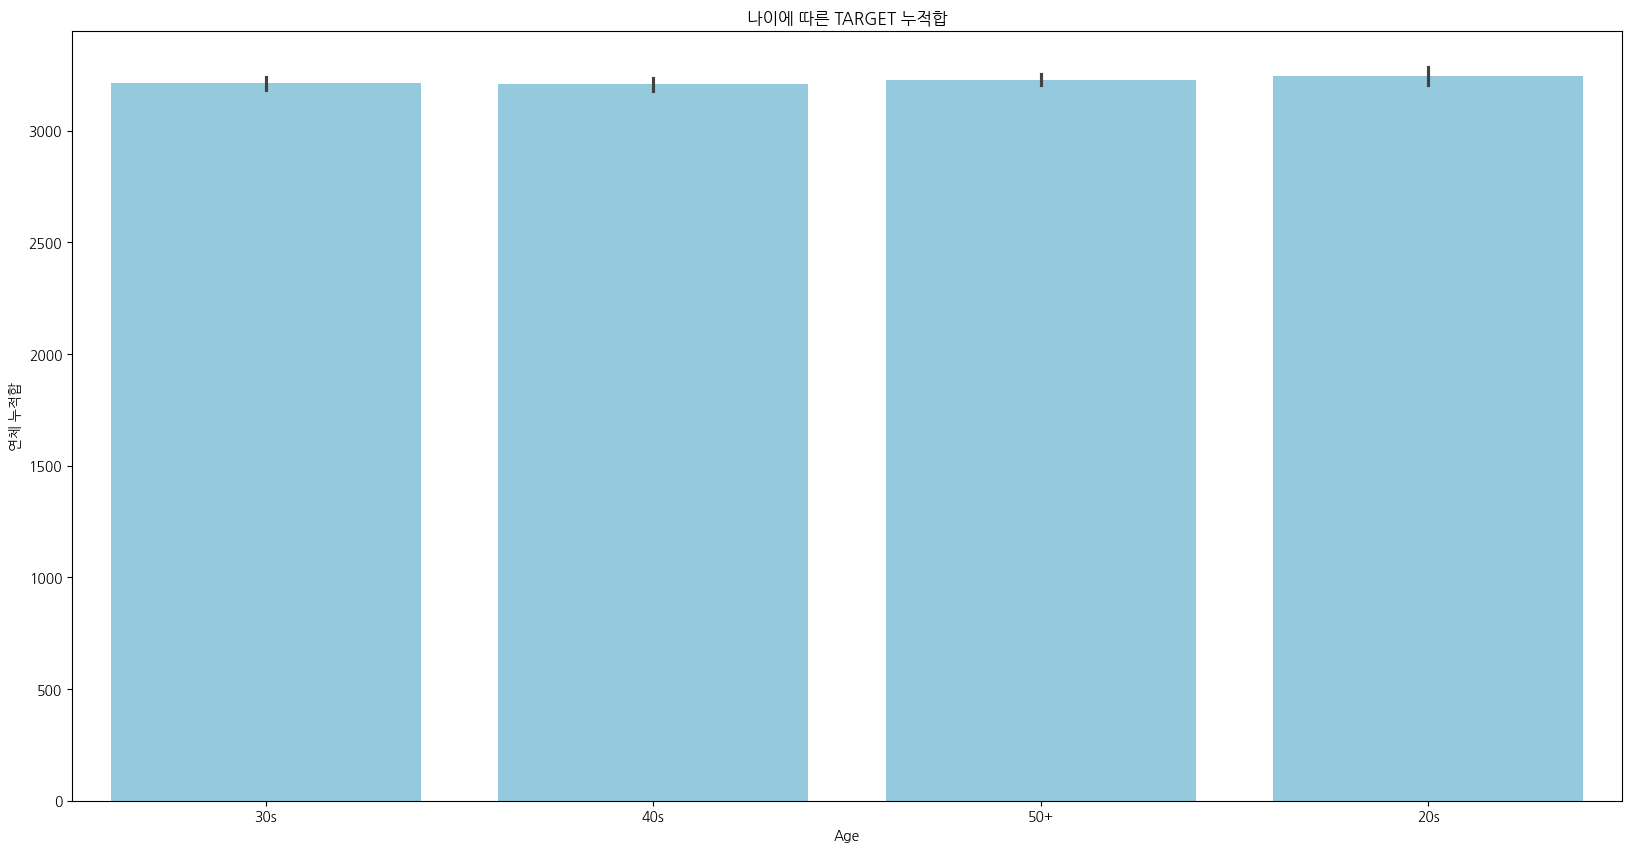

In [42]:
df['TARGET_누적'] = df['TARGET'].cumsum()

plt.figure(figsize=(20, 10))
sns.barplot(x='나이', y='TARGET_누적', data=df, color='skyblue')

# 그래프에 타이틀과 축 레이블 추가
plt.title('나이에 따른 TARGET 누적합')
plt.xlabel('Age')
plt.ylabel('연체 누적합')

# 그래프 보여주기
plt.show()

In [43]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder

## 데이터 증폭하기

In [96]:
X = df.drop(['TARGET', 'ID'], axis=1)
y = df['TARGET']
X_test = df_test.drop('ID', axis = 1)
# SMOTE 객체 생성
smote = SMOTE(sampling_strategy=0.5) 
X = pd.get_dummies(X, drop_first=True)
X = X.astype(int)
X_test = pd.get_dummies(X_test, drop_first=True)
X_test = X_test.astype(int)

In [97]:
diff_columns = X.columns.difference(X_test.columns)

In [98]:
X = X.drop(diff_columns, axis=1)

In [99]:
# 증폭된 데이터 생성
X_resampled, y_resampled = smote.fit_resample(X, y)
X_resampled = pd.DataFrame(X_resampled)
X_resampled['TARGET'] = y_resampled
X['TARGET'] = y

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_5616\1882516050.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_resampled['TARGET'] = y_resampled


In [100]:
X_train = pd.concat([X, X_resampled], ignore_index=True)
y_train = X_train['TARGET']
X_train = X_train.drop('TARGET', axis=1)

In [103]:
X_train

,성별,차량 소유 여부,부동산 소유 여부,자녀 수,연간 수입,최종 학력,거주지 인구 비율,휴대전화 소유 여부,업무용 휴대전화 소유 여부,이메일 소유 여부,...,산업군_정부,산업군_종교,산업군_주택,산업군_통신,산업군_학교,산업군_호텔,산업군_환경,나이_30s,나이_40s,나이_50+
0,0,1,1,2,18054000,2,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,1,0,0,59472000,4,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,29736000,2,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,0,1,38232000,2,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,26550000,2,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140353,1,0,1,0,53100000,2,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
140354,0,0,1,0,63720000,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
140355,1,1,0,0,53100000,2,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
140356,0,0,1,0,24426000,2,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
X_test

,성별,차량 소유 여부,부동산 소유 여부,자녀 수,연간 수입,최종 학력,거주지 인구 비율,휴대전화 소유 여부,업무용 휴대전화 소유 여부,이메일 소유 여부,...,산업군_정부,산업군_종교,산업군_주택,산업군_통신,산업군_학교,산업군_호텔,산업군_환경,나이_30s,나이_40s,나이_50+
0,1,0,0,2,37170000,3,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,47790000,4,0,1,1,0,...,1,0,0,0,0,0,0,0,1,0
2,1,1,1,1,37170000,2,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,31860000,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,2,19116000,2,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0,1,1,0,84960000,4,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
39996,0,0,1,0,21240000,2,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
39997,0,0,0,1,21240000,2,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
39998,0,1,0,0,18054000,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


### Catboost때 정제한 방식의 결과가 더 좋았기에, 같은 데이터로 RFC모델 실행

In [108]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict_proba(X_test)
submission = pd.read_csv('./sample_submission.csv')
submission['TARGET'] = y_pred[:,1]
submission.to_csv('./rfc_submission2.csv', index=False)

rfc 모델 결과: 0.62554
<br>
놀라운 상승폭

In [50]:
from catboost import CatBoostClassifier

In [51]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

model = CatBoostClassifier()
model.fit(X_train2, y_train2)

# 테스트 세트에 대한 예측
y_pred2 = model.predict(X_test2)

# 정확도 출력
accuracy = accuracy_score(y_test2, y_pred2)
print("Accuracy:", accuracy)

NameError: name 'train_test_split' is not defined

In [53]:
model = CatBoostClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Learning rate set to 0.085075
0:	learn: 0.6501793	total: 174ms	remaining: 2m 53s
1:	learn: 0.6153552	total: 185ms	remaining: 1m 32s
2:	learn: 0.5873329	total: 197ms	remaining: 1m 5s
3:	learn: 0.5666806	total: 208ms	remaining: 51.7s
4:	learn: 0.5470178	total: 218ms	remaining: 43.5s
5:	learn: 0.5292626	total: 229ms	remaining: 38s
6:	learn: 0.5152081	total: 240ms	remaining: 34.1s
7:	learn: 0.5036148	total: 251ms	remaining: 31.1s
8:	learn: 0.4937339	total: 262ms	remaining: 28.8s
9:	learn: 0.4864459	total: 272ms	remaining: 27s
10:	learn: 0.4793788	total: 283ms	remaining: 25.4s
11:	learn: 0.4734194	total: 293ms	remaining: 24.1s
12:	learn: 0.4688167	total: 302ms	remaining: 23s
13:	learn: 0.4640764	total: 312ms	remaining: 21.9s
14:	learn: 0.4602248	total: 321ms	remaining: 21.1s
15:	learn: 0.4561702	total: 331ms	remaining: 20.3s
16:	learn: 0.4529780	total: 339ms	remaining: 19.6s
17:	learn: 0.4498496	total: 349ms	remaining: 19s
18:	learn: 0.4469708	total: 358ms	remaining: 18.5s
19:	learn: 0.4435

In [ ]:
y_pred = model.predict_proba(X_test)
submission = pd.read_csv('./sample_submission.csv')
submission['TARGET'] = y_pred[:,1]
submission.to_csv('./catboost_submission.csv', index=False)

In [ ]:
submission

catboost 모델(증폭)
점수: 0.60932

### 컬럼들을 좀 드랍하고 해보기로 결정

In [55]:
df = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

In [57]:
df['나이'] = df['나이'].apply(lambda x: age_cat2(x))
df_test['나이'] = df_test['나이'].apply(lambda x: age_cat2(x))
df['성별'] = df['성별'].apply(lambda x: 1 if x == '남성' else 0)
df_test['성별'] = df_test['성별'].apply(lambda x: 1 if x == '남성' else 0)
df['최종 학력'] = df['최종 학력'].apply(lambda x: labeling(x))
df_test['최종 학력'] = df_test['최종 학력'].apply(lambda x: labeling(x))
df['근속연수'] = df['근속연수'].apply(lambda x: 30 if x == 1000 else x)
df_test['근속연수'] = df_test['근속연수'].apply(lambda x: 30 if x == 1000 else x)

In [60]:
df['직업'].nunique()

19

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              60000 non-null  object 
 1   TARGET          60000 non-null  int64  
 2   성별              60000 non-null  int64  
 3   차량 소유 여부        60000 non-null  int64  
 4   부동산 소유 여부       60000 non-null  int64  
 5   자녀 수            60000 non-null  int64  
 6   연간 수입           60000 non-null  float64
 7   수입 유형           60000 non-null  object 
 8   최종 학력           60000 non-null  int64  
 9   결혼 여부           60000 non-null  object 
 10  주거 형태           60000 non-null  object 
 11  거주지 인구 비율       60000 non-null  float64
 12  휴대전화 소유 여부      60000 non-null  int64  
 13  업무용 휴대전화 소유 여부  60000 non-null  int64  
 14  이메일 소유 여부       60000 non-null  int64  
 15  직업              60000 non-null  object 
 16  가족 구성원 수        60000 non-null  float64
 17  산업군             60000 non-null 

In [81]:
X = df.drop(['ID', '자녀 수', '결혼 여부', '휴대전화 소유 여부', '거주지 인구 비율', '이메일 소유 여부', '산업군', '나이'], axis=1)
X_test = df_test.drop(['ID', '자녀 수', '결혼 여부', '휴대전화 소유 여부', '거주지 인구 비율', '이메일 소유 여부', '산업군', '나이'], axis=1)
y = df['TARGET']


In [82]:
# SMOTE 객체 생성
smote = SMOTE(sampling_strategy=0.8) 
X = pd.get_dummies(X, drop_first=True)
X = X.astype(int)
X_test = pd.get_dummies(X_test, drop_first=True)
X_test = X_test.astype(int)
diff_columns = X.columns.difference(X_test.columns)
X_resampled, y_resampled = smote.fit_resample(X, y)
X_resampled = pd.DataFrame(X_resampled)
X_resampled['TARGET'] = y_resampled
X['TARGET'] = y

In [83]:
X_resampled['TARGET'].value_counts()

TARGET
0    53572
1    42857
Name: count, dtype: int64

In [85]:
X_train = X_resampled.drop('TARGET', axis=1)
y_train = X_resampled['TARGET']

In [86]:
X_train

,성별,차량 소유 여부,부동산 소유 여부,연간 수입,최종 학력,업무용 휴대전화 소유 여부,가족 구성원 수,근속연수,가입연수,수입 유형_근로자,...,직업_비서,직업_영업직,직업_요식업 종사자,직업_운전자,직업_의료 업계 종사자,직업_인사 담당자,직업_저임금 노동자,직업_조리사,직업_핵심 노동자,직업_회계사
0,0,1,1,18054000,2,0,4,30,23,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,59472000,4,1,2,4,16,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,29736000,2,1,2,3,9,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,38232000,2,1,3,6,12,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,26550000,2,1,2,0,4,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96424,0,0,1,19116000,3,1,2,1,28,0,...,0,0,0,0,0,0,0,0,0,0
96425,0,0,1,7530504,2,0,1,30,19,0,...,0,0,0,0,0,0,0,0,0,0
96426,1,0,0,42480000,2,1,2,0,2,1,...,0,0,0,1,0,0,0,0,0,0
96427,0,0,0,63720000,2,1,2,0,4,1,...,0,0,0,0,0,0,0,0,0,0


In [87]:
X_test

,성별,차량 소유 여부,부동산 소유 여부,연간 수입,최종 학력,업무용 휴대전화 소유 여부,가족 구성원 수,근속연수,가입연수,수입 유형_근로자,...,직업_비서,직업_영업직,직업_요식업 종사자,직업_운전자,직업_의료 업계 종사자,직업_인사 담당자,직업_저임금 노동자,직업_조리사,직업_핵심 노동자,직업_회계사
0,1,0,0,37170000,3,1,4,2,8,1,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,47790000,4,1,2,8,11,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,37170000,2,1,3,15,14,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,31860000,2,0,2,30,7,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,19116000,2,1,4,10,2,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0,1,1,84960000,4,1,2,2,12,0,...,0,0,0,0,0,0,0,0,0,0
39996,0,0,1,21240000,2,1,1,4,29,1,...,0,1,0,0,0,0,0,0,0,0
39997,0,0,0,21240000,2,1,3,14,22,0,...,0,0,0,0,0,0,0,0,0,0
39998,0,1,0,18054000,2,0,2,30,31,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
X_train = X_train.drop('수입 유형_학생', axis=1)

In [93]:
model = CatBoostClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Learning rate set to 0.072475
0:	learn: 0.6733097	total: 9.62ms	remaining: 9.61s
1:	learn: 0.6564753	total: 19.1ms	remaining: 9.54s
2:	learn: 0.6444800	total: 29.3ms	remaining: 9.74s
3:	learn: 0.6329711	total: 38.7ms	remaining: 9.63s
4:	learn: 0.6216144	total: 46.8ms	remaining: 9.32s
5:	learn: 0.6104224	total: 55.3ms	remaining: 9.16s
6:	learn: 0.6033004	total: 63.7ms	remaining: 9.04s
7:	learn: 0.5943581	total: 71.6ms	remaining: 8.88s
8:	learn: 0.5870587	total: 79.8ms	remaining: 8.79s
9:	learn: 0.5813709	total: 87.8ms	remaining: 8.69s
10:	learn: 0.5735015	total: 95.8ms	remaining: 8.61s
11:	learn: 0.5661931	total: 104ms	remaining: 8.6s
12:	learn: 0.5609868	total: 113ms	remaining: 8.56s
13:	learn: 0.5563486	total: 120ms	remaining: 8.46s
14:	learn: 0.5502382	total: 127ms	remaining: 8.36s
15:	learn: 0.5461401	total: 134ms	remaining: 8.26s
16:	learn: 0.5418173	total: 142ms	remaining: 8.18s
17:	learn: 0.5383683	total: 149ms	remaining: 8.14s
18:	learn: 0.5334958	total: 156ms	remaining: 8.04s
1

In [94]:
y_pred = model.predict_proba(X_test)
submission = pd.read_csv('./sample_submission.csv')
submission['TARGET'] = y_pred[:,1]
submission.to_csv('./catboost_submission.csv', index=False)

catboost 모델 2탄: 0.5828

## 4. LogisticRegreession model

In [107]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)
submission = pd.read_csv('./sample_submission.csv')
submission['TARGET'] = y_pred[:,1]
submission.to_csv('./lr_submission.csv', index=False)

lr 모델: 0.597

## 최종 결과

* 최고점(RFC + 증폭 데이터): 0.62554

## 보완점

* 결측값이 가시적으로 보이는 데이터는 아니었지만, 조금 더 신경써서 정제했다면 더 좋은 결과였을 것 같다.

* GridSearch, RandomSearch등 최적 파라미터 찾는 법을 조금 더 공부해서, 파라미터를 조정했으면 더 좋았ㅇ